### 3. Polynomial Regression

### 공부 시간에 따른 시험 점수(우등생)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('PolynomialRegressionData.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

### 3-1 단순 선형 회귀(Simple Linear Regression)

In [3]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y) # 전체 데이터 학습

LinearRegression()

#### 데이터 시각화(전체)

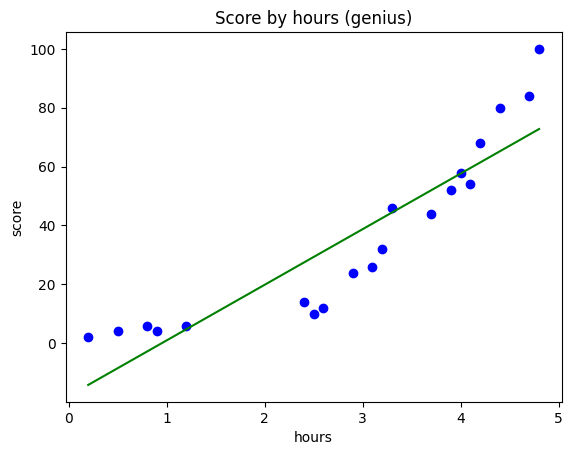

In [4]:
plt.scatter(X,y,color='blue') #산점도
plt.plot(X,reg.predict(X),color="green") #선 그래프
plt.title('Score by hours (genius)') #제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


In [5]:
reg.score(X,y) #전체 데이터를 통한 모델 평가

0.8169296513411765

#### 3-2. 다항회귀(Polynomial Regression)

In [6]:
from sklearn.preprocessing import PolynomialFeatures  #몇차다항식으로 할지 설정가능하도록 해준다
poly_reg=PolynomialFeatures(degree=4) #2차 다항식
X_poly= poly_reg.fit_transform(X)  # 다항식에 맞게 데이터 변환
X_poly[:5] # [x] ->[x^0,x^1,x^2] -> x가 3이라면 [1,3,9]로 변환
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [7]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y) # 변환된 x와 y를 이용하여 모델생성(학습)

LinearRegression()

#### 데이터 시각화(변환된 X와y)

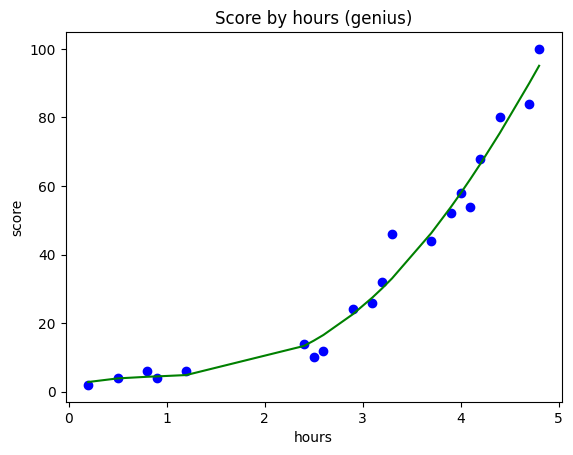

In [8]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)),color='green')
plt.title('Score by hours (genius)') #제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


In [9]:
X_range=np.arange(min(X),max(X),0.1) # X의 최소값에서 최대값까지의 범위를 0.1단위로 잘라서 데이터 생성


In [10]:
X_range.shape

(46,)

In [11]:
X_range=X_range.reshape(-1,1) # row갯수 자동으로 계산하고 ,column 갯수는 1개
X_range.shape


(46, 1)

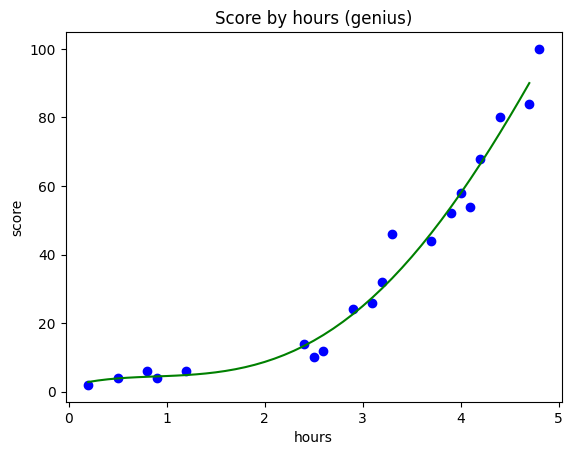

In [12]:
plt.scatter(X,y,color='blue')
plt.plot(X_range,lin_reg.predict(poly_reg.fit_transform(X_range)),color='green')
plt.title('Score by hours (genius)') #제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


#### 공부시간에 따른 시험 성적 예측

In [13]:
reg.predict([[2]]) # 2시간 공부 했을때 선형회귀 모델의 예측

array([19.85348988])

In [14]:
lin_reg.predict(poly_reg.fit_transform([[2]]))# 2시간 공부 했을때 다항회귀 모델의 예측

array([8.70559135])

In [15]:
lin_reg.score(X_poly,y)

0.9782775579000045